In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [136]:
header_names = ['#errors',
                'scan#', 
                'motor-target_1', 
                'motor-target_2', 
                'motor-actual_1',
                'motor-actual_2',
                'data_channel_0',
                'data_channel_1', 
                'data_channel_2',
                'data_channel_3',
                'data_channel_4',
                'data_channel_5',
                'data_channel_6',
                'data_channel_7']

data = pd.read_csv('../data/trial_output05.tsv', delimiter='\t', names = header_names)

In [139]:
# Check that all is copacetic
data.describe()

,#errors,scan#,motor-target_1,motor-target_2,motor-actual_1,motor-actual_2,data_channel_0,data_channel_1,data_channel_2,data_channel_3,data_channel_4,data_channel_5,data_channel_6,data_channel_7
count,45628.0,45628.000000,45628.000000,45628.000000,45628.000000,45628.000000,45628.000000,45628.000000,45628.000000,45628.000000,45628.000000,45628.000000,45628.000000,45628.000000
mean,0.0,5.378978,9.314018,33.425522,9.314025,33.425522,-0.005923,-0.006613,-0.006294,-0.006124,-0.007194,-0.006101,-0.021113,0.004937
std,0.0,3.390998,0.058022,0.050232,0.058011,0.050232,0.006699,0.022854,0.005250,0.010072,0.022253,0.009477,0.014158,0.015740
min,0.0,0.000000,9.215000,33.340000,9.215000,33.340000,-0.032503,-0.063398,-0.031538,-0.047629,-0.058893,-0.037974,-0.032503,-0.025745
25%,0.0,2.000000,9.263000,33.382000,9.263000,33.382000,-0.010298,-0.027033,-0.009654,-0.013194,-0.027033,-0.012229,-0.022849,0.003219
50%,0.0,5.000000,9.314000,33.427000,9.314000,33.427000,-0.006436,-0.008689,-0.006436,-0.007080,-0.009976,-0.007401,-0.021240,0.004828
75%,0.0,8.000000,9.365000,33.469000,9.365000,33.469000,-0.000965,0.012873,-0.002252,0.000644,0.011586,0.001288,-0.019631,0.006115
max,0.0,11.000000,9.413000,33.511000,9.413100,33.511000,0.018022,0.059537,0.016735,0.039906,0.056963,0.025424,1.671540,1.827301


In [138]:
# There are 58*67 = 3,886 samples per scan
# Note: (3,886*11 SCANS) + 2,882 = 45,628 TOTAL Samples
# Notice 11 complete scans (Scan '11.0' incomplete)
# Scans are averaged together, homodyne OKE results
data['scan#'].value_counts().sort_index()

0.0     3886
1.0     3886
2.0     3886
3.0     3886
4.0     3886
5.0     3886
6.0     3886
7.0     3886
8.0     3886
9.0     3886
10.0    3886
11.0    2882
Name: scan#, dtype: int64

In [80]:
II = data[data['scan#']==11.0]
II['motor-target_1'].value_counts().sort_index()

9.215    44
9.218    43
9.221    41
9.224    46
9.227    47
         ..
9.401    42
9.404    45
9.407    43
9.410    39
9.413    42
Name: motor-target_1, Length: 67, dtype: int64

In [82]:
II.groupby('motor-target_1')['motor-target_2'].describe()

,count,mean,std,min,25%,50%,75%,max
motor-target_1,,,,,,,,
9.215,44.0,33.423250,0.050233,33.343,33.38125,33.4210,33.46375,33.511
9.218,43.0,33.426442,0.049335,33.340,33.38950,33.4270,33.46750,33.508
9.221,41.0,33.431390,0.050713,33.343,33.39400,33.4360,33.47200,33.511
9.224,46.0,33.424391,0.050437,33.340,33.38575,33.4195,33.46825,33.511
9.227,47.0,33.429426,0.052897,33.340,33.38050,33.4300,33.47650,33.511
...,...,...,...,...,...,...,...,...
9.401,42.0,33.426071,0.054334,33.340,33.37975,33.4165,33.47425,33.511
9.404,45.0,33.425400,0.049455,33.343,33.38500,33.4270,33.46300,33.511
9.407,43.0,33.422744,0.051156,33.340,33.37750,33.4240,33.46300,33.511


In [83]:
II

,#errors,scan#,motor-target_1,motor-target_2,motor-actual_1,motor-actual_2,data_channel_0,data_channel_1,data_channel_2,data_channel_3,data_channel_4,data_channel_5,data_channel_6,data_channel_7
42746,0.0,11.0,9.221,33.493,9.2210,33.493,0.004184,0.004184,-0.007401,-0.021883,-0.029607,-0.003861,-0.018343,0.006759
42747,0.0,11.0,9.287,33.382,9.2870,33.382,-0.002574,0.000322,-0.003861,-0.010298,-0.011585,0.000000,-0.018987,0.005793
42748,0.0,11.0,9.377,33.466,9.3770,33.466,0.006115,0.000644,-0.012229,-0.018987,-0.023171,0.000644,-0.019309,0.006115
42749,0.0,11.0,9.230,33.352,9.2300,33.352,-0.013838,-0.032503,-0.008689,-0.009976,0.021562,0.002897,-0.017700,0.009011
42750,0.0,11.0,9.227,33.358,9.2270,33.358,-0.008689,-0.027676,-0.012551,-0.006114,0.011586,-0.010941,-0.018665,0.007081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45623,0.0,11.0,9.290,33.502,9.2900,33.502,-0.001609,-0.032503,-0.016091,-0.014481,0.001931,0.007081,-0.018987,0.005793
45624,0.0,11.0,9.302,33.511,9.3021,33.511,-0.013516,-0.020274,-0.005149,-0.005149,0.004184,-0.006436,-0.016734,0.008368
45625,0.0,11.0,9.275,33.466,9.2750,33.466,-0.017700,-0.037009,-0.009654,0.003219,0.020275,-0.003540,-0.016412,0.008046
45626,0.0,11.0,9.362,33.448,9.3620,33.448,-0.019309,-0.037974,-0.009654,0.004828,0.022528,-0.003540,-0.015769,0.009977


In [31]:
# No errors identified in 45,628 measurements!
# An error may consist of a communication error b/w motor & acquisition computer
# Motors will be reinitialized, and the scan is restarted
data['#errors'].value_counts()

0.0    45628
Name: #errors, dtype: int64

In [86]:
# There are 67-motor_1 positions each with b/w 670(9.245)-689(9.236) samples taken
# Motor_1 positions range (9.215, 9.413)
data['motor-target_1'].value_counts().sort_index()

9.215    682
9.218    681
9.221    679
9.224    684
9.227    685
        ... 
9.401    680
9.404    683
9.407    681
9.410    677
9.413    680
Name: motor-target_1, Length: 67, dtype: int64

In [116]:
# Scan 11.0 (out of 67 positions)
data[data['scan#']==11.0][['motor-target_1','motor-target_2']].groupby('motor-target_1').count()['motor-target_2'].value_counts()

44    12
42     9
40     8
43     6
41     6
46     5
48     3
47     3
39     3
49     2
45     2
50     2
38     2
36     1
51     1
37     1
32     1
Name: motor-target_2, dtype: int64

In [118]:
# Scan 11.0 (out of 58 positions)
data[data['scan#']==11.0][['motor-target_2','motor-target_1']].groupby('motor-target_2').count()['motor-target_1'].value_counts()

50    9
51    8
49    8
52    7
47    6
45    4
56    3
55    3
48    3
54    2
42    2
53    1
46    1
38    1
Name: motor-target_1, dtype: int64

In [111]:
for row in np.arange(12.0):
    display(row)
    display(data[data['scan#']==row][['motor-target_1','motor-target_2']].groupby('motor-target_1').count()['motor-target_2'].value_counts())

0.0

58    67
Name: motor-target_2, dtype: int64

1.0

58    67
Name: motor-target_2, dtype: int64

2.0

58    67
Name: motor-target_2, dtype: int64

3.0

58    67
Name: motor-target_2, dtype: int64

4.0

58    67
Name: motor-target_2, dtype: int64

5.0

58    67
Name: motor-target_2, dtype: int64

6.0

58    67
Name: motor-target_2, dtype: int64

7.0

58    67
Name: motor-target_2, dtype: int64

8.0

58    67
Name: motor-target_2, dtype: int64

9.0

58    67
Name: motor-target_2, dtype: int64

10.0

58    67
Name: motor-target_2, dtype: int64

11.0

44    12
42     9
40     8
43     6
41     6
46     5
48     3
47     3
39     3
49     2
45     2
50     2
38     2
36     1
51     1
37     1
32     1
Name: motor-target_2, dtype: int64

In [117]:
for row in np.arange(12.0):
    display(row)
    display(data[data['scan#']==row][['motor-target_2','motor-target_1']].groupby('motor-target_2').count()['motor-target_1'].value_counts())

0.0

67    58
Name: motor-target_1, dtype: int64

1.0

67    58
Name: motor-target_1, dtype: int64

2.0

67    58
Name: motor-target_1, dtype: int64

3.0

67    58
Name: motor-target_1, dtype: int64

4.0

67    58
Name: motor-target_1, dtype: int64

5.0

67    58
Name: motor-target_1, dtype: int64

6.0

67    58
Name: motor-target_1, dtype: int64

7.0

67    58
Name: motor-target_1, dtype: int64

8.0

67    58
Name: motor-target_1, dtype: int64

9.0

67    58
Name: motor-target_1, dtype: int64

10.0

67    58
Name: motor-target_1, dtype: int64

11.0

50    9
51    8
49    8
52    7
47    6
45    4
56    3
55    3
48    3
54    2
42    2
53    1
46    1
38    1
Name: motor-target_1, dtype: int64

In [33]:
# step-size for motor_1
# Why is the range of positions greater for motor_1 than motor_2?
(9.413-9.215)/67

0.002955223880597021

In [71]:
len(data[data['scan#']==11.0])

2882

In [67]:
# motor-target_1: 67-rows, (9.215, 9.413)
# motor-target_2: 58-rows, (33.340, 33.511)

len(data[data['scan#']==11.0].groupby('motor-target_2').count())

58

In [126]:
(II['motor-target_1'].value_counts().sort_index()/67).mean()

0.6420138115393182

0.8567181926278238

In [134]:
# Each motor_2 position has b/w 38(33.481)-56(33.391, 33.400, 33.478) samples taken
# There are 58 motor_2 positions in range (33.340, 33.511)
mt2_pct = (II['motor-target_2'].value_counts().sort_index()/58).mean()
print(f'AVG amount of measurements taken out of 58: {mt2_pct*100:,.2f}%')
II['motor-target_2'].value_counts().sort_index()

AVG amount of measurements taken out of 58: 85.67%


33.340    53
33.343    49
33.346    47
33.349    49
33.352    50
33.355    46
33.358    52
33.361    51
33.364    51
33.367    51
33.370    50
33.373    48
33.376    50
33.379    50
33.382    47
33.385    42
33.388    47
33.391    56
33.394    45
33.397    55
33.400    56
33.403    50
33.406    48
33.409    49
33.412    45
33.415    45
33.418    45
33.421    49
33.424    51
33.427    50
33.430    51
33.433    42
33.436    52
33.439    55
33.442    52
33.445    49
33.448    48
33.451    52
33.454    49
33.457    54
33.460    49
33.463    52
33.466    47
33.469    54
33.472    51
33.475    50
33.478    56
33.481    38
33.484    52
33.487    47
33.490    47
33.493    50
33.496    49
33.499    50
33.502    51
33.505    51
33.508    55
33.511    52
Name: motor-target_2, dtype: int64

In [35]:
# step-size for motor_2
(33.511-33.340)/58

0.0029482758620689546

In [36]:
#data = data.drop(columns=['#errors', 'scan#'])

In [58]:
data1 = data.groupby(['motor-target_1', 'motor-target_2']).mean()
data1.head(59)
display(len(data))
len(data1)

45628

3886

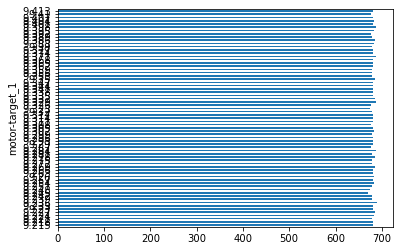

In [76]:
data2 = data.groupby('motor-target_1')['motor-target_2'].count()
data2.plot(kind='barh')

In [55]:
data2 = data.groupby(['motor-target_2', 'motor-target_1']).mean()
data2.head(68)

#errors  scan#  motor-actual_1  motor-actual_2  \
motor-target_2 motor-target_1                                                   
33.340         9.215               0.0    5.0        9.215036          33.340   
               9.218               0.0    5.5        9.218017          33.340   
               9.221               0.0    5.0        9.221009          33.340   
               9.224               0.0    5.5        9.224067          33.340   
               9.227               0.0    5.5        9.227025          33.340   
...                                ...    ...             ...             ...   
               9.404               0.0    5.0        9.404000          33.340   
               9.407               0.0    5.5        9.406983          33.340   
               9.410               0.0    5.5        9.409983          33.340   
               9.413               0.0    5.0        9.412991          33.340   
33.343         9.215               0.0    5.5        9.215033          33.343   

                               data_channel_0  data_channel_1  data_channel_2  \
motor-target_2 motor-target_1                                                   
33.340         9.215                -0.009157       -0.001375       -0.004885   
               9.218                -0.007536       -0.017968       -0.007053   
               9.221                -0.006758       -0.012551       -0.007489   
               9.224                -0.008635       -0.014776       -0.008206   
               9.227                -0.003915        0.000698       -0.005739   
...                                       ...             ...             ...   
               9.404                -0.002867       -0.008104       -0.008103   
               9.407                -0.006946       -0.006651       -0.004344   
               9.410                -0.007294       -0.006570       -0.004800   
               9.413                -0.004417       -0.012755       -0.007197   
33.343         9.215                -0.002789        0.003701       -0.005765   

                               data_channel_3  data_channel_4  data_channel_5  \
motor-target_2 motor-target_1                                                   
33.340         9.215                 0.001171       -0.005061       -0.007782   
               9.218                -0.010083       -0.004559       -0.004237   
               9.221                -0.007519       -0.002662       -0.005471   
               9.224                -0.003540        0.005445       -0.001260   
               9.227                -0.007053       -0.006409       -0.007616   
...                                       ...             ...             ...   
               9.404                -0.012258       -0.014130       -0.006553   
               9.407                -0.005337       -0.008394       -0.007079   
               9.410                -0.002413       -0.003379       -0.007321   
               9.413                -0.008630       -0.013487       -0.005061   
33.343         9.215                -0.008689       -0.019577       -0.008823   

                               data_channel_6  data_channel_7  
motor-target_2 motor-target_1                                  
33.340         9.215                -0.022000        0.004272  
               9.218                -0.021025        0.004962  
               9.221                -0.020245        0.005881  
               9.224                -0.021508        0.004104  
               9.227                -0.020677        0.005471  
...                                       ...             ...  
               9.404                -0.021825        0.004243  
               9.407                -0.021535        0.004667  
               9.410                -0.021588        0.004694  
               9.413                -0.020538        0.004916  
33.343         9.215                -0.021830        0.004345  

[68 rows x 12 columns]

In [38]:
display(data.head(60))
data_to_plot = data['data_channel_0'].reset_index().pivot(columns='motor-target_1', index='motor-target_2')
display(data_to_plot)
sns.heatmap(data_to_plot)

,#errors,scan#,motor-target_1,motor-target_2,motor-actual_1,motor-actual_2,data_channel_0,data_channel_1,data_channel_2,data_channel_3,data_channel_4,data_channel_5,data_channel_6,data_channel_7
0,0.0,0.0,9.395,33.448,9.3950,33.448,0.013195,0.010942,-0.006436,-0.019309,-0.031860,-0.005470,1.671540,1.827301
1,0.0,0.0,9.236,33.400,9.2360,33.400,0.003862,0.014804,0.000322,-0.010620,-0.024458,-0.008689,1.370637,1.558580
2,0.0,0.0,9.242,33.433,9.2420,33.433,0.000644,-0.035400,-0.016412,-0.009332,0.010299,0.009333,1.125409,1.304020
3,0.0,0.0,9.380,33.373,9.3800,33.373,-0.004827,-0.036043,-0.007401,-0.010620,0.028321,0.005793,0.923627,1.082929
4,0.0,0.0,9.302,33.457,9.3021,33.457,0.001288,-0.008367,-0.008689,-0.010941,-0.025423,-0.010298,0.755637,0.894985
5,0.0,0.0,9.296,33.472,9.2960,33.472,-0.001609,0.009655,-0.001609,-0.001287,-0.012551,-0.013516,0.617575,0.738580
6,0.0,0.0,9.275,33.511,9.2750,33.511,-0.003861,-0.018343,-0.007080,-0.010941,-0.030894,-0.010620,0.504616,0.609208
7,0.0,0.0,9.398,33.457,9.3980,33.457,-0.009654,-0.031538,-0.009654,-0.006436,0.030895,0.007081,0.413541,0.505260
8,0.0,0.0,9.239,33.511,9.2390,33.511,-0.010298,0.028321,0.004506,0.004506,-0.016734,-0.020918,0.335016,0.416759
9,0.0,0.0,9.344,33.511,9.3440,33.511,-0.002252,0.010621,-0.001609,-0.002574,-0.008689,-0.017378,0.272583,0.343705


KeyError: "None of ['motor-target_2', 'motor-target_1'] are in the columns"